In [1]:
# Brasília - Random Forest

import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 6,4
sns.set(style='whitegrid', palette='muted',
        rc={'figure.figsize': (6,4)})

import warnings
warnings.simplefilter(action='ignore')

In [2]:
df = pd.read_excel(r"Brasilia_ML_Std.xls")
df.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_DF
0,-0.717529,-0.626223,-0.666778,-0.196953,-0.477565,1
1,-0.838328,-0.807425,-0.792635,0.885682,-0.286445,1
2,-0.516970,-0.574450,-0.631149,-1.795652,1.239965,1
3,-0.777291,-0.761828,-0.761104,-1.063986,0.201244,1
4,-0.716441,-0.647552,-0.681930,-0.602536,-0.301323,1


In [3]:
# Predicting Cartel
# define X and y
X = df.drop("Cartel_DF",axis = 1)
y = df.Cartel_DF

In [4]:
# summarize the dataset
print(X.shape, y.shape)

(489, 5) (489,)


In [5]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.24.2


In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42, stratify=y)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [8]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    124.0  218.0       1.0      342.0         342.0
_______________________________________________
Confusion Matrix: 
 [[124   0]
 [  0 218]]

Test Result:
Accuracy Score: 97.96%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   1.000000   0.968750  0.979592    0.984375      0.980230
recall      0.944444   1.000000  0.979592    0.972222      0.979592
f1-score    0.971429   0.984127  0.979592    0.977778      0.979462
support    54.000000  93.000000  0.979592  147.000000    147.000000
_______________________________________________
Confusion

In [9]:
#Random Forest hyperparameter tuning - Randomized Search Cross Validation

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from numpy import arange

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
criterion = ['gini', 'entropy' ]
max_features = ['auto', 'sqrt']
max_depth = [2, 4, 6, 8, 10]
#max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
max_samples = [float(i) for i in arange(0.1, 1.1, 0.1)]

random_grid = {'n_estimators': n_estimators, 'criterion': criterion,'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap, 'max_samples': max_samples}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_samples': 0.9, 'max_features': 'sqrt', 'max_depth': 8, 'criterion': 'entropy', 'bootstrap': True})
Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    124.0  218.0       1.0      342.0         342.0
_______________________________________________
Confusion Matrix: 
 [[124   0]
 [  0 218]]

Test Result:
Accuracy Score: 97.96%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy   macro avg  weighted avg
precision   1.000000   0.968750  0.979592    0.984375      0.980230
recall   

In [10]:
# make class predictions for the testing set
y_pred = rf_clf.predict(X_test)

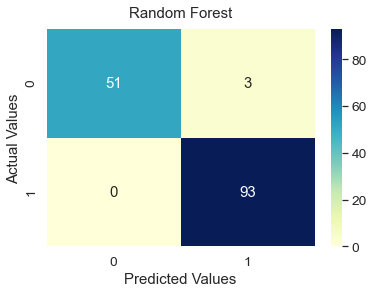

In [91]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
sns.set(font_scale=1.25) # Adjust to fit
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_RandomForest_Brasilia.png', dpi=600)

In [12]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.97      1.00      0.98        93

    accuracy                           0.98       147
   macro avg       0.98      0.97      0.98       147
weighted avg       0.98      0.98      0.98       147



In [13]:
# store the predicted probabilities for class 1
from sklearn.metrics import roc_curve
y_pred_proba = rf_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

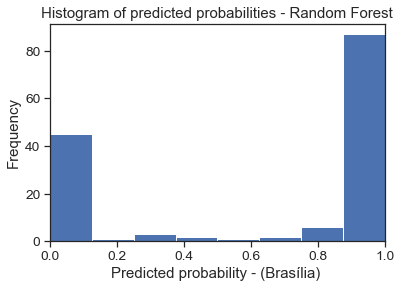

In [97]:
# histogram of predicted probabilities
plt.hist(y_pred_proba, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities - Random Forest')
plt.xlabel('Predicted probability - (Brasília) ')
plt.ylabel('Frequency')
plt.grid(False)
plt.savefig('Histogram_RandomForest_Brasiia.eps', format='eps')
plt.show()

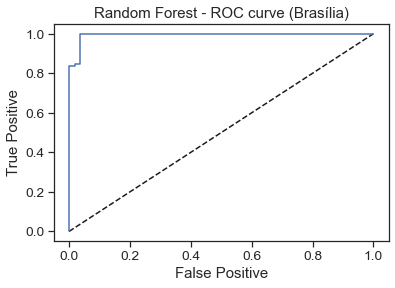

In [98]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Random Forest - ROC curve (Brasília)')
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_RandomForest_Brasilia.eps', format='eps')

In [16]:
from sklearn.metrics import roc_curve
y_pred_proba = rf_clf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [17]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
auc = cross_val_score(rf_clf, X_test, y_test, cv=5, scoring='roc_auc').mean()
print('AUC:',auc)

AUC: 0.9961722488038276


In [18]:
import eli5
from eli5.sklearn import PermutationImportance

In [19]:
perm = PermutationImportance(rf_clf, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.3946 ± 0.0298,Price_sd
0.0177 ± 0.0163,CV
0.0095 ± 0.0067,Price_skewness
0.0054 ± 0.0102,SPD
0.0014 ± 0.0054,Price_kurtosis


In [20]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tpr[thresholds > threshold][-1])
    print('specificity:', 1 - fpr[thresholds > threshold][-1])

In [21]:
evaluate_threshold(0.5)

sensitivity: 1.0
specificity: 0.962962962962963


In [22]:
evaluate_threshold(0.6)

sensitivity: 1.0
specificity: 0.962962962962963


In [23]:
evaluate_threshold(0.7)

sensitivity: 1.0
specificity: 0.962962962962963


In [24]:
evaluate_threshold(0.8)

sensitivity: 0.8494623655913979
specificity: 0.962962962962963


In [25]:
evaluate_threshold(0.9)

sensitivity: 0.8494623655913979
specificity: 0.962962962962963


In [26]:
evaluate_threshold(0.99)

sensitivity: 0.45161290322580644
specificity: 1.0


In [27]:
#Testing the Best Model estimated for Brasilia (Random Forest) in the Belo Horizonte's database

df_BH= pd.read_excel(r"BeloHorizonte_ML_Std.xls")
df_BH.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_BH
0,2.189400,0.696896,-0.998037,1.168642,1.167386,1
1,2.080311,0.575242,-1.052757,1.306965,1.297908,1
2,2.721430,0.301509,-1.186487,0.909275,1.058800,1
3,1.905134,0.254569,-1.208158,1.094816,1.235846,1
4,2.879854,0.487816,-1.101539,0.829424,0.997040,1


In [28]:
# Predicting the Cartel in Belo Horizonte
# define X and y
X_BH = df_BH.drop("Cartel_BH",axis = 1)
y_BH = df_BH.Cartel_BH

In [29]:
# summarize the dataset
print(X.shape, y.shape, X_BH.shape, y_BH.shape)

(489, 5) (489,) (496, 5) (496,)


In [30]:
print_score(rf_clf, X_train, y_train, X_BH, y_BH, train=False)

Test Result:
Accuracy Score: 79.23%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.898618    0.709677  0.792339    0.804147      0.814813
recall       0.706522    0.900000  0.792339    0.803261      0.792339
f1-score     0.791075    0.793587  0.792339    0.792331      0.792189
support    276.000000  220.000000  0.792339  496.000000    496.000000
_______________________________________________
Confusion Matrix: 
 [[195  81]
 [ 22 198]]



In [31]:
# make class predictions for the testing set
y_pred_BH = rf_clf.predict(X_BH)

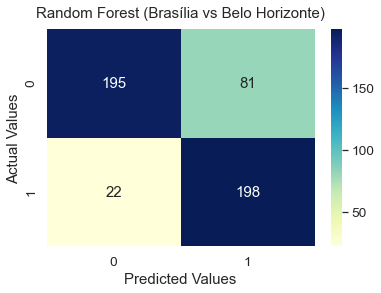

In [93]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_BH, y_pred_BH)
sns.set(font_scale=1.25) # Adjust to fit
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest (Brasília vs Belo Horizonte)', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_RandomForest_BrasiliavsBeloHorizonte.png', dpi=600)

In [33]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_BH,y_pred_BH))

              precision    recall  f1-score   support

           0       0.90      0.71      0.79       276
           1       0.71      0.90      0.79       220

    accuracy                           0.79       496
   macro avg       0.80      0.80      0.79       496
weighted avg       0.81      0.79      0.79       496



In [34]:
from sklearn.metrics import roc_curve
y_pred_BH_proba = rf_clf.predict_proba(X_BH)[:,1]
fprBH, tprBH, thresholdsBH = roc_curve(y_BH, y_pred_BH_proba)

In [35]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auc_BH = roc_auc_score(y_BH,y_pred_BH_proba)
print('AUC Brasilia vs Belo Horizonte:',auc_BH)

AUC Brasilia vs Belo Horizonte: 0.8812664690382082


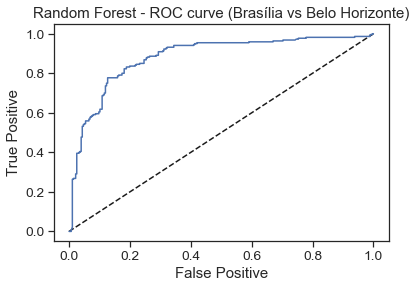

In [99]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fprBH,tprBH, label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Random Forest - ROC curve (Brasília vs Belo Horizonte)')
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_RandomForest_BrasiliavsBeloHorizonte.png', format='png')

In [37]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tprBH[thresholdsBH > threshold][-1])
    print('specificity:', 1 - fprBH[thresholdsBH > threshold][-1])

In [38]:
evaluate_threshold(0.5)

sensitivity: 0.8909090909090909
specificity: 0.7065217391304348


In [39]:
evaluate_threshold(0.6)

sensitivity: 0.7909090909090909
specificity: 0.8369565217391304


In [40]:
evaluate_threshold(0.7)

sensitivity: 0.5772727272727273
specificity: 0.9311594202898551


In [41]:
evaluate_threshold(0.8)

sensitivity: 0.39545454545454545
specificity: 0.967391304347826


In [42]:
evaluate_threshold(0.9)

sensitivity: 0.2681818181818182
specificity: 0.9782608695652174


In [43]:
evaluate_threshold(0.99)

sensitivity: 0.09090909090909091
specificity: 0.9891304347826086


In [44]:
#Testing the Best Model estimated for Brasilia (Random Forest) in the Caxias do Sul's database

df_CS= pd.read_excel(r"CaxiasdoSul_ML_Std.xls")
df_CS.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_CS
0,-0.502234,-0.771008,-0.954957,-1.152634,0.981293,1
1,-0.011977,-0.384726,-0.753369,-2.024678,2.454060,1
2,-0.637640,-0.824221,-0.983101,-1.343260,1.275377,1
3,0.079973,-0.440566,-0.781865,-2.067829,2.904549,1
4,0.141272,-0.439377,-0.781214,-2.052522,2.963625,1


In [45]:
# Predicting the Cartel in Caxias do Sul
# define X and y
X_CS = df_CS.drop("Cartel_CS",axis = 1)
y_CS = df_CS.Cartel_CS

In [46]:
# summarize the dataset
print(X.shape, y.shape, X_CS.shape, y_CS.shape)

(489, 5) (489,) (484, 5) (484,)


In [47]:
print_score(rf_clf, X_train, y_train, X_CS, y_CS, train=False)

Test Result:
Accuracy Score: 70.25%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.987952    0.553459  0.702479    0.770705      0.828159
recall       0.535948    0.988764  0.702479    0.762356      0.702479
f1-score     0.694915    0.709677  0.702479    0.702296      0.700344
support    306.000000  178.000000  0.702479  484.000000    484.000000
_______________________________________________
Confusion Matrix: 
 [[164 142]
 [  2 176]]



In [48]:
# make class predictions for the testing set
y_pred_CS = rf_clf.predict(X_CS)

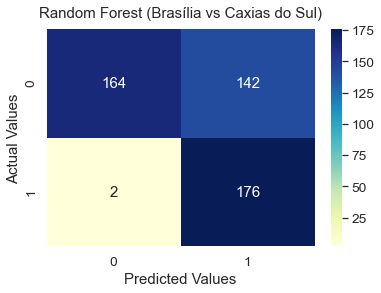

In [94]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_CS, y_pred_CS)
sns.set(font_scale=1.25) # Adjust to fit
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest (Brasília vs Caxias do Sul)', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_RandomForest_BrasiliavsCaxiasdoSul.png', dpi=600)
plt.savefig('CM_RandomForest_BrasiliavsCaxiasdoSul.eps', format='eps')

In [50]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_CS,y_pred_CS))

              precision    recall  f1-score   support

           0       0.99      0.54      0.69       306
           1       0.55      0.99      0.71       178

    accuracy                           0.70       484
   macro avg       0.77      0.76      0.70       484
weighted avg       0.83      0.70      0.70       484



In [51]:
y_pred_CS_proba = rf_clf.predict_proba(X_CS)[:,1]
fprCS, tprCS, thresholdsCS = roc_curve(y_CS, y_pred_CS_proba)
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auc_CS = roc_auc_score(y_CS,y_pred_CS_proba)
print('AUC Brasilia vs Caxias do Sul:',auc_CS)

AUC Brasilia vs Caxias do Sul: 0.926048321950503


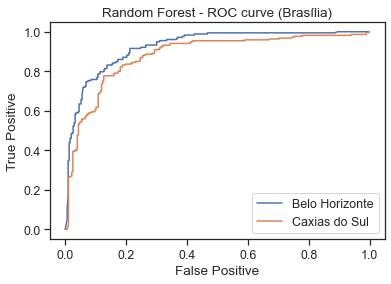

In [104]:
#plt.plot([0,1],[0,1],'k--')
plt.plot(fprCS,tprCS, fprBH, tprBH, label='Logistic')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('Random Forest - ROC curve (Brasília)')
plt.legend(['Belo Horizonte', 'Caxias do Sul'])
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_RandomForest_BrasiliavsBH_CS.png', format='png')

In [53]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tprCS[thresholdsCS > threshold][-1])
    print('specificity:', 1 - fprCS[thresholdsCS > threshold][-1])

In [54]:
evaluate_threshold(0.5)

sensitivity: 0.9887640449438202
specificity: 0.5751633986928104


In [55]:
evaluate_threshold(0.6)

sensitivity: 0.9719101123595506
specificity: 0.630718954248366


In [56]:
evaluate_threshold(0.7)

sensitivity: 0.9325842696629213
specificity: 0.6993464052287581


In [57]:
evaluate_threshold(0.8)

sensitivity: 0.848314606741573
specificity: 0.826797385620915


In [58]:
evaluate_threshold(0.9)

sensitivity: 0.6573033707865169
specificity: 0.9444444444444444


In [59]:
evaluate_threshold(0.99)

sensitivity: 0.29775280898876405
specificity: 0.9901960784313726


In [60]:
#Testing the Best Model estimated for Brasilia (Random Forest) in São Luís

df_SL= pd.read_excel(r"SaoLuis_ML_Std.xls")
df_SL.head()

,SPD,CV,Price_sd,Price_skewness,Price_kurtosis,Cartel_SL
0,-1.512210,-1.415126,-1.523575,0.530595,-0.372297,1
1,-1.590998,-1.423813,-1.531361,0.465319,-0.465210,1
2,-1.472599,-1.390720,-1.500943,0.277075,-0.523992,1
3,-1.891792,-1.794681,-1.874691,0.988610,-0.150930,1
4,-1.512210,-1.424056,-1.531331,-0.390301,-0.859725,1


In [61]:
# Predicting the Cartel in São Luís
# define X and y
X_SL = df_SL.drop("Cartel_SL",axis = 1)
y_SL = df_SL.Cartel_SL

In [62]:
# summarize the dataset
print(X.shape, y.shape, X_SL.shape, y_SL.shape)

(489, 5) (489,) (449, 5) (449,)


In [63]:
print_score(rf_clf, X_train, y_train, X_SL, y_SL, train=False)

Test Result:
Accuracy Score: 59.24%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.640212    0.557692  0.592428    0.598952      0.601065
recall       0.512712    0.680751  0.592428    0.596732      0.592428
f1-score     0.569412    0.613108  0.592428    0.591260      0.590141
support    236.000000  213.000000  0.592428  449.000000    449.000000
_______________________________________________
Confusion Matrix: 
 [[121 115]
 [ 68 145]]



In [64]:
# make class predictions for the testing set
y_pred_SL = rf_clf.predict(X_SL)

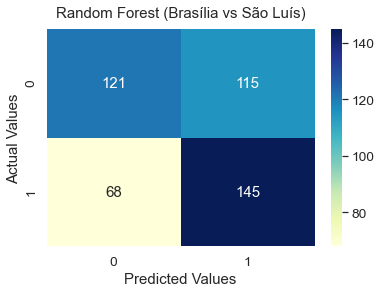

In [95]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_SL, y_pred_SL)
sns.set(font_scale=1.2) # Adjust to fit
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Random Forest (Brasília vs São Luís)', y=1.025)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.savefig('CM_RandomForest_BrasiliavsSaoLuis.png', dpi=600)
plt.savefig('CM_RandomForest_BrasiliavsSaoLuis.eps', format='eps')

In [66]:
#import classification_report
print(classification_report(y_SL,y_pred_SL))

              precision    recall  f1-score   support

           0       0.64      0.51      0.57       236
           1       0.56      0.68      0.61       213

    accuracy                           0.59       449
   macro avg       0.60      0.60      0.59       449
weighted avg       0.60      0.59      0.59       449



In [67]:
#Area under ROC curve
y_pred_SL_proba = rf_clf.predict_proba(X_SL)[:,1]
fprSL, tprSL, thresholdsSL = roc_curve(y_SL, y_pred_SL_proba)
#Area under ROC curve
from sklearn.metrics import roc_auc_score
auc_SL = roc_auc_score(y_SL,y_pred_SL_proba)
print('AUC Brasilia vs São Luís:',auc_SL)

AUC Brasilia vs São Luís: 0.6945074401209517


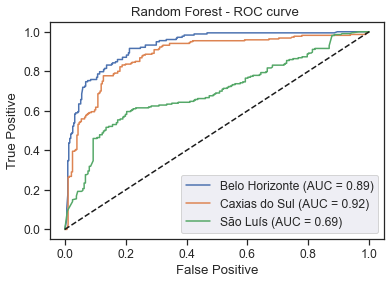

In [108]:
plt.plot(fprCS,tprCS, fprBH, tprBH, fprSL, tprSL, label='Logistic')
sns.set(font_scale=1.1) # Adjust to fit
plt.xlabel('False Positive')#False Positive Rate
plt.ylabel('True Positive')#True Positive Rate
plt.title('Random Forest - ROC curve ')
plt.legend(['Belo Horizonte (AUC = 0.89)', 'Caxias do Sul (AUC = 0.92)', 'São Luís (AUC = 0.69)'])
plt.plot([0,1],[0,1],'k--')
plt.grid(False)
sns.set_style("ticks")
plt.savefig('ROC_RandomForest_Brasilia_vs_BH_CS_SL.png', format='png', dpi=600)

In [69]:
# define a function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('sensitivity:', tprSL[thresholdsSL > threshold][-1])
    print('specificity:', 1 - fprSL[thresholdsSL > threshold][-1])

In [70]:
evaluate_threshold(0.5)

sensitivity: 0.6807511737089202
specificity: 0.5127118644067796


In [71]:
evaluate_threshold(0.6)

sensitivity: 0.6431924882629108
specificity: 0.6271186440677966


In [72]:
evaluate_threshold(0.7)

sensitivity: 0.6150234741784038
specificity: 0.7245762711864407


In [73]:
evaluate_threshold(0.8)

sensitivity: 0.5727699530516432
specificity: 0.8050847457627118


In [74]:
evaluate_threshold(0.9)

sensitivity: 0.4788732394366197
specificity: 0.885593220338983


In [75]:
evaluate_threshold(0.99)

sensitivity: 0.215962441314554
specificity: 0.9364406779661016
